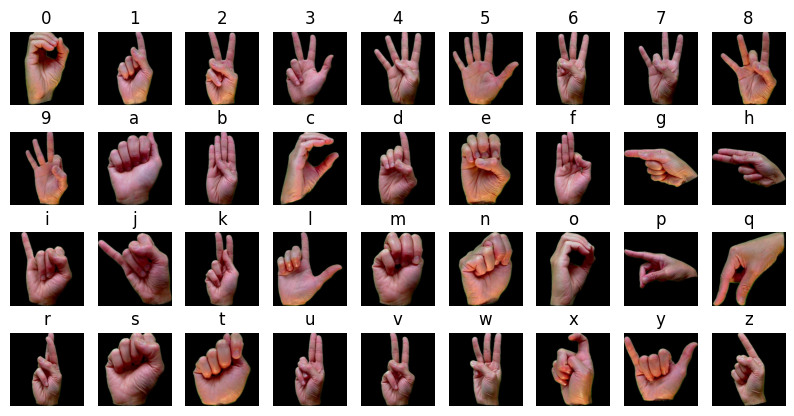

In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

path = "./asl_dataset/"

fig, ax = plt.subplots(4, 9, figsize=(10, 5))
img_classes = [os.path.join(path, im) for im in os.listdir(path)]
ax = ax.flatten()

data, label = [], []

for i, img_class in enumerate(img_classes):
    img = os.listdir(img_class)[np.random.randint(0, 10)]
    img_path = os.path.join(img_class, img)
    image = cv2.imread(img_path)
    ax[i].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    ax[i].set_title(os.path.basename(img_class))
    ax[i].axis('off')

    # Przetwarzanie obrazu
    img = cv2.resize(image, (128, 128))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    data.append(img)
    label.append(os.path.basename(img_class))

plt.show()

data = np.array(data)
label = np.array(label)
label = label.astype(str)



In [42]:
import cv2 as cv
import math as m

path = "./asl_dataset/"

labels = os.listdir(path)
X_train = []
y_train = []
X_test = []
y_test = []
X_valid = []
y_valid = []

for i, label in enumerate(labels):
    folderpath = path + label + '/'
    for file in os.listdir(folderpath)[0:m.floor(len(os.listdir(folderpath))*0.7)]:
        img_path = folderpath + file
        img = cv.imread(img_path)
        img = cv.resize(img, (224, 224))
        X_train.append(np.array(img))
        y_train.append(i)
    for file in os.listdir(folderpath)[m.floor(len(os.listdir(folderpath))*0.7):m.floor(len(os.listdir(folderpath))*0.9)]:
        img_path = folderpath + file
        img = cv.imread(img_path)
        img = cv.resize(img, (224, 224))
        X_test.append(np.array(img))
        y_test.append(i)
    for file in os.listdir(folderpath)[m.floor(len(os.listdir(folderpath))*0.9):]:
        img_path = folderpath + file
        img = cv.imread(img_path)
        img = cv.resize(img, (224, 224))
        X_valid.append(np.array(img))
        y_valid.append(i)

X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)
X_valid = np.array(X_valid)
y_valid = np.array(y_valid)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
print(X_valid.shape)
print(y_valid.shape)

(1760, 224, 224, 3)
(1760,)
(503, 224, 224, 3)
(503,)
(252, 224, 224, 3)
(252,)


In [43]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense


In [44]:
base_model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(36, activation='softmax'),
])

In [45]:
base_model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [46]:
base_model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))

Epoch 1/10
55/55 [==============================] - 57s 1s/step - loss: 26.1814 - accuracy: 0.6881 - val_loss: 3.5333 - val_accuracy: 0.3373
Epoch 2/10
55/55 [==============================] - 57s 1s/step - loss: 1.4244 - accuracy: 0.9369 - val_loss: 7.2636 - val_accuracy: 0.3373
Epoch 3/10
55/55 [==============================] - 58s 1s/step - loss: 0.1419 - accuracy: 0.9761 - val_loss: 11.2538 - val_accuracy: 0.3056
Epoch 4/10
55/55 [==============================] - 54s 990ms/step - loss: 0.2323 - accuracy: 0.9744 - val_loss: 9.9354 - val_accuracy: 0.3214
Epoch 5/10
55/55 [==============================] - 56s 1s/step - loss: 0.8375 - accuracy: 0.9670 - val_loss: 22.3977 - val_accuracy: 0.3214
Epoch 6/10
55/55 [==============================] - 55s 1s/step - loss: 0.0408 - accuracy: 0.9932 - val_loss: 18.3565 - val_accuracy: 0.3611
Epoch 7/10
55/55 [==============================] - 55s 1s/step - loss: 2.0542 - accuracy: 0.9568 - val_loss: 42.4263 - val_accuracy: 0.3532
Epoch 8/10
5

In [47]:
results = base_model.evaluate(X_test, y_test)
print(results)

16/16 [==============================] - 4s 214ms/step - loss: 16.7536 - accuracy: 0.5030
[16.753612518310547, 0.5029820799827576]
